In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm, tqdm_notebook, trange
pd.pandas.set_option('display.max_columns', None)

import Validation

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_excel('Train_dataset.xlsx', sheet_name = 'Train_dataset')
test = pd.read_excel('Test_dataset.xlsx', sheet_name = 'Test_dataset')
train.shape, test.shape

((10714, 28), (14498, 27))

In [3]:
train_df = pd.read_excel('Train_dataset.xlsx', sheet_name = 'Diuresis_TS')
train_df.head()

people_ID  2020-03-20 00:00:00  2020-03-21 00:00:00  2020-03-22 00:00:00  \
0          1                  441                544.2               669.64   
1          2                  151                197.2               253.24   
2          3                  416                515.2               632.44   
3          4                  410                506.0               621.40   
4          5                  390                483.0               595.00   

   2020-03-23 00:00:00  2020-03-24 00:00:00  2020-03-25 00:00:00  \
0              821.368            1002.2416           1215.68992   
1              321.688             399.9256            492.91072   
2              776.728             947.7736           1150.32832   
3              761.880             928.1560           1126.78720   
4              730.200             892.8400           1084.40800   

   2020-03-26 00:00:00  
0          1472.627904  
1           606.892864  
2          1395.793984  
3          1368.344640  
4          1315.889600

In [4]:
train.shape, train_df.shape

((10714, 28), (10714, 8))

In [5]:
len(np.intersect1d(train['people_ID'], train_df['people_ID']))

10714

In [9]:
data = train_df.drop('people_ID', axis=1).T
data

0           1            2           3  \
2020-03-20 00:00:00   441.000000  151.000000   416.000000   410.00000   
2020-03-21 00:00:00   544.200000  197.200000   515.200000   506.00000   
2020-03-22 00:00:00   669.640000  253.240000   632.440000   621.40000   
2020-03-23 00:00:00   821.368000  321.688000   776.728000   761.88000   
2020-03-24 00:00:00  1002.241600  399.925600   947.773600   928.15600   
2020-03-25 00:00:00  1215.689920  492.910720  1150.328320  1126.78720   
2020-03-26 00:00:00  1472.627904  606.892864  1395.793984  1368.34464   

                             4            5            6           7  \
2020-03-20 00:00:00   390.0000   389.000000   322.000000  194.000000   
2020-03-21 00:00:00   483.0000   480.800000   401.400000  246.800000   
2020-03-22 00:00:00   595.0000   591.160000   497.080000  310.360000   
2020-03-23 00:00:00   730.2000   723.992000   611.096000  388.632000   
2020-03-24 00:00:00   892.8400   882.690400   749.015200  482.958400   
2020-03-25 00:00:00  1084.4080  1072.228480   911.818240  592.550080   
2020-03-26 00:00:00  1315.8896  1301.274176  1110.381888  724.860096   

                              8           9           10          11  \
2020-03-20 00:00:00   310.00000  242.000000   373.000000  192.000000   
2020-03-21 00:00:00   385.00000  303.400000   463.600000  245.400000   
2020-03-22 00:00:00   477.40000  379.480000   570.520000  309.880000   
2020-03-23 00:00:00   589.08000  469.976000   702.424000  389.656000   
2020-03-24 00:00:00   720.79600  578.771200   857.708800  482.387200   
2020-03-25 00:00:00   877.95520  707.525440  1042.250560  591.864640   
2020-03-26 00:00:00  1069.74624  865.230528  1266.100672  725.637568   

                              12         13           14          15  \
2020-03-20 00:00:00   403.000000  120.00000   382.000000  239.000000   
2020-03-21 00:00:00   497.600000  157.00000   474.400000  301.800000   
2020-03-22 00:00:00   612.520000  203.80000   583.480000  377.560000   
2020-03-23 00:00:00   751.224000  262.36000   717.976000  470.872000   
2020-03-24 00:00:00   917.168800  328.73200   876.371200  580.746400   
2020-03-25 00:00:00  1113.602560  407.47840  1064.645440  709.895680   
2020-03-26 00:00:00  1352.523072  503.57408  1293.774528  865.674816   

                             16          17          18         19  \
2020-03-20 00:00:00  199.000000  182.000000  181.000000  220.00000   
2020-03-21 00:00:00  253.800000  232.400000  233.200000  279.00000   
2020-03-22 00:00:00  318.760000  295.480000  295.240000  351.40000   
2020-03-23 00:00:00  398.712000  372.376000  372.088000  439.48000   
2020-03-24 00:00:00  494.154400  461.651200  463.105600  542.17600   
2020-03-25 00:00:00  605.985280  566.981440  568.726720  663.61120   
2020-03-26 00:00:00  741.782336  694.977728  698.672064  812.53344   

                             20         21          22          23  \
2020-03-20 00:00:00  246.000000  220.00000   415.00000  203.000000   
2020-03-21 00:00:00  308.200000  278.00000   514.00000  258.600000   
2020-03-22 00:00:00  385.240000  350.20000   632.20000  324.520000   
2020-03-23 00:00:00  480.088000  436.44000   776.44000  404.024000   
2020-03-24 00:00:00  590.905600  539.42800   945.62800  500.528800   
2020-03-25 00:00:00  722.086720  660.31360  1147.75360  613.634560   
2020-03-26 00:00:00  881.104064  807.77632  1391.90432  751.761472   

                             24           25          26         27  \
2020-03-20 00:00:00  148.000000   381.000000  251.000000  185.00000   
2020-03-21 00:00:00  190.600000   473.200000  315.200000  236.00000   
2020-03-22 00:00:00  242.920000   584.440000  392.440000  299.80000   
2020-03-23 00:00:00  309.304000   719.128000  485.528000  377.56000   
2020-03-24 00:00:00  386.864800   877.753600  596.533600  468.77200   
2020-03-25 00:00:00  477.237760  1066.304320  728.840320  575.52640   
2020-03-26 00:00:00  588.085312  1293.365184  888.408384  704.43168   

                        

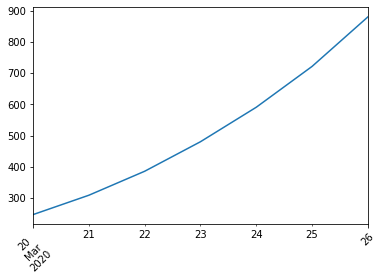

In [84]:
data[20].plot()
plt.xticks(rotation=45)
plt.savefig('Prob_2_plot.png')

In [53]:
x = [1, 2, 3, 4, 5, 6, 7]
y = data[20].values

In [47]:
print(np.poly1d(np.polyfit(x, y, 2)))

       2
9.366 x + 30.03 x + 208.8


In [51]:
(np.array(x)**2)*9.366+30.03*np.array(x)+208.8

array([ 248.196,  306.324,  383.184,  478.776,  593.1  ,  726.156,
        877.944, 1048.464])

In [52]:
y

array([246.      , 308.2     , 385.24    , 480.088   , 590.9056  ,
       722.08672 , 881.104064])

In [57]:
np.polyfit(x, y, 2)

array([  9.36585143,  30.02858971, 208.80066743])

In [58]:
model[0]

9.365851428571458

In [76]:
result = []
for i in range(10714):
    x = [1, 2, 3, 4, 5, 6, 7]
    y = data[i].values
    model = np.polyfit(x, y, 2)
    a = model[0]
    b = model[1]
    c = model[2]
    pred = 64*a+8*b+c
    result.append(pred)

In [77]:
pd.Series(result).head()

0    1743.465042
1     724.551191
2    1652.950459
3    1620.209623
4    1559.255771
dtype: float64

In [78]:
pd.Series(result).tail()

10709     658.230661
10710    1542.827319
10711     806.777056
10712    1426.645765
10713     820.694917
dtype: float64

In [79]:
len(result)

10714

In [80]:
train['Diuresis'] = result

In [82]:
train.to_csv('Prob_2_train.csv', index=False)